In [20]:
import kagglehub
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
try:
    print("Downloading dataset...")
    path = kagglehub.dataset_download("mohankrishnathalla/diabetes-health-indicators-dataset")
    print(f"Dataset downloaded to: {path}")

    files = os.listdir(path)
    print("Available files:", files)
    
    csv_files = [f for f in files if f.endswith('.csv')]
    
    if csv_files:
        csv_file = csv_files[0]  
        df = pd.read_csv(os.path.join(path, csv_file))
        print(f"\nReading file: {csv_file}")
        print("First 5 records:")
        print(df.head())
        print(f"\nDataset shape: {df.shape}")
        print(f"Columns: {list(df.columns)}")
    else:
        print("No CSV files found in the dataset")
        
except Exception as e:
    print(f"Error: {e}")


Dataset downloaded to: C:\Users\KIIT0001\.cache\kagglehub\datasets\mohankrishnathalla\diabetes-health-indicators-dataset\versions\1
Available files: ['diabetes_dataset.csv']

Reading file: diabetes_dataset.csv
First 5 records:
   age  gender ethnicity education_level  income_level employment_status  \
0   58    Male     Asian      Highschool  Lower-Middle          Employed   
1   48  Female     White      Highschool        Middle          Employed   
2   60    Male  Hispanic      Highschool        Middle        Unemployed   
3   74  Female     Black      Highschool           Low           Retired   
4   46    Male     White        Graduate        Middle           Retired   

  smoking_status  alcohol_consumption_per_week  \
0          Never                             0   
1         Former                             1   
2          Never                             1   
3          Never                             0   
4          Never                             1   

   physical_act

In [21]:
df

age  gender ethnicity education_level  income_level employment_status  \
0       58    Male     Asian      Highschool  Lower-Middle          Employed   
1       48  Female     White      Highschool        Middle          Employed   
2       60    Male  Hispanic      Highschool        Middle        Unemployed   
3       74  Female     Black      Highschool           Low           Retired   
4       46    Male     White        Graduate        Middle           Retired   
...    ...     ...       ...             ...           ...               ...   
99995   46    Male     Other        Graduate  Upper-Middle        Unemployed   
99996   41  Female     White        Graduate        Middle          Employed   
99997   57  Female     Black       No formal  Upper-Middle          Employed   
99998   47  Female     Black      Highschool  Lower-Middle           Retired   
99999   52  Female     White    Postgraduate        Middle          Employed   

      smoking_status  alcohol_consumption_per_week  \
0              Never                             0   
1             Former                             1   
2              Never                             1   
3              Never                             0   
4              Never                             1   
...              ...                           ...   
99995         Former                             1   
99996          Never                             3   
99997         Former                             4   
99998          Never                             3   
99999          Never                             1   

       physical_activity_minutes_per_week  diet_score  ...  hdl_cholesterol  \
0                                     215         5.7  ...               41   
1                                     143         6.7  ...               55   
2                                      57         6.4  ...               66   
3                                      49         3.4  ...               50   
4                                     109         7.2  ...               52   
...                                   ...         ...  ...              ...   
99995                                 136         8.3  ...               45   
99996                                  76         8.8  ...               55   
99997                                 121         9.9  ...               50   
99998                                  52         5.9  ...               68   
99999                                 248         2.7  ...               31   

       ldl_cholesterol  triglycerides  glucose_fasting  glucose_postprandial  \
0                  160            145              136                   236   
1                   50             30               93                   150   
2                   99             36              118                   195   
3                   79            140              139                   253   
4                  125            160              137                   184   
...                ...            ...              ...                   ...   
99995              150            116              113                   109   
99996              123            146               96                   146   
99997              111            184               93                   132   
99998               91            116              106                   117   
99999              183             87               91                   142   

       insulin_level  hba1c  diabetes_risk_score  diabetes_stage  \
0               6.36   8.18                 29.6          Type 2   
1               2.00   5.63                 23.0     No Diabetes   
2               5.07   7.51                 44.7          Type 2   
3               5.28   9.03                 38.2          Type 2   
4              12.74   7.20                 23.5          Type 2   
...              ...    ...                  ...             ...   
99995      

In [23]:
#EDA
print(df.describe())
#there are 100000 rows and 31 columns in this data set
print(df.info())

#Handling Missing values
missing_values=df.isna().sum().sum()
print('here are the count of the missing values')
print(missing_values)

#we can observe that there are no missing values in this dataset

                age  alcohol_consumption_per_week  \
count  100000.00000                 100000.000000   
mean       50.12041                      2.003670   
std        15.60460                      1.417779   
min        18.00000                      0.000000   
25%        39.00000                      1.000000   
50%        50.00000                      2.000000   
75%        61.00000                      3.000000   
max        90.00000                     10.000000   

       physical_activity_minutes_per_week     diet_score  sleep_hours_per_day  \
count                       100000.000000  100000.000000        100000.000000   
mean                           118.911640       5.994787             6.997818   
std                             84.409662       1.780954             1.094622   
min                              0.000000       0.000000             3.000000   
25%                             57.000000       4.800000             6.300000   
50%                            100.0

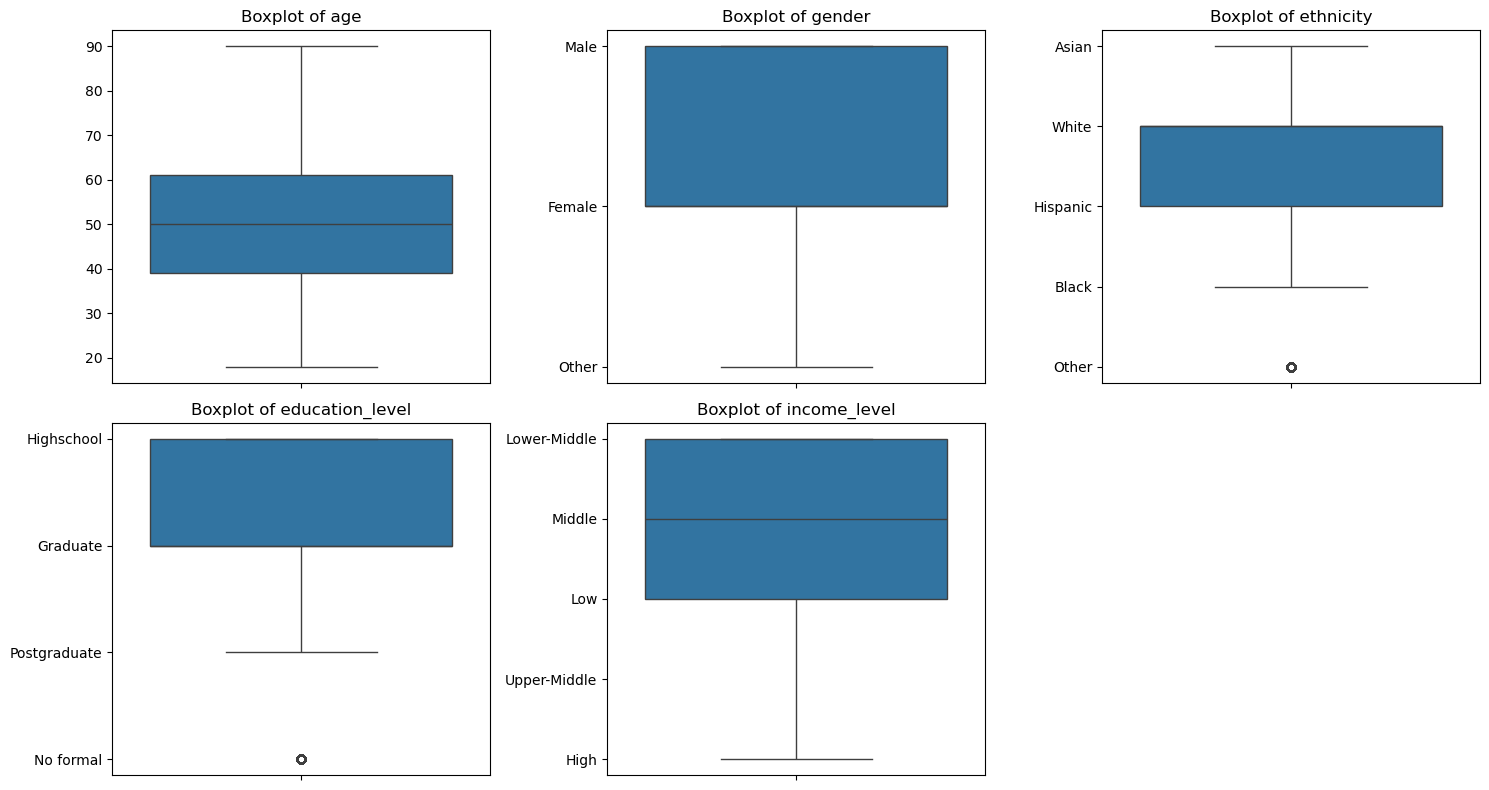

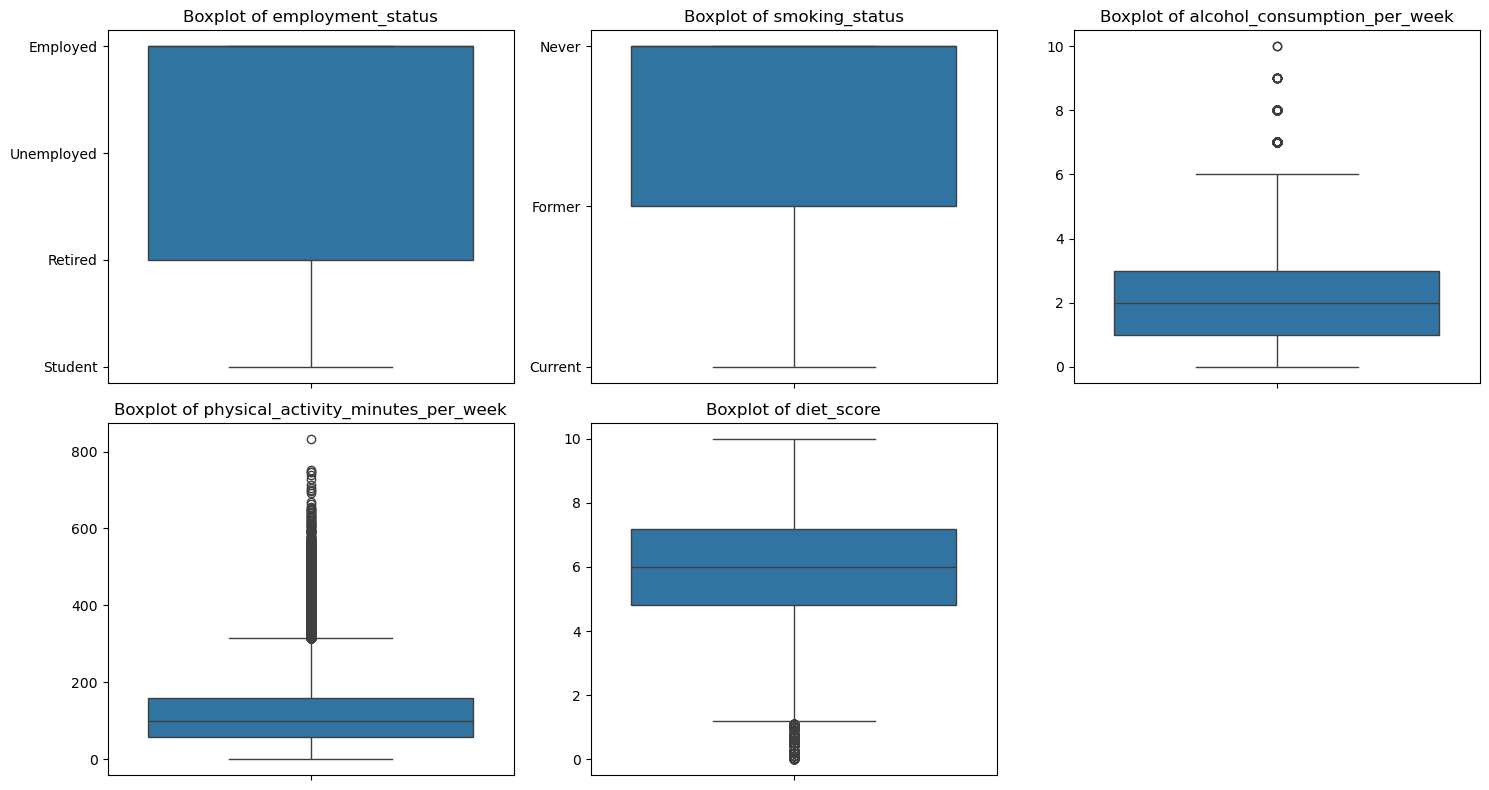

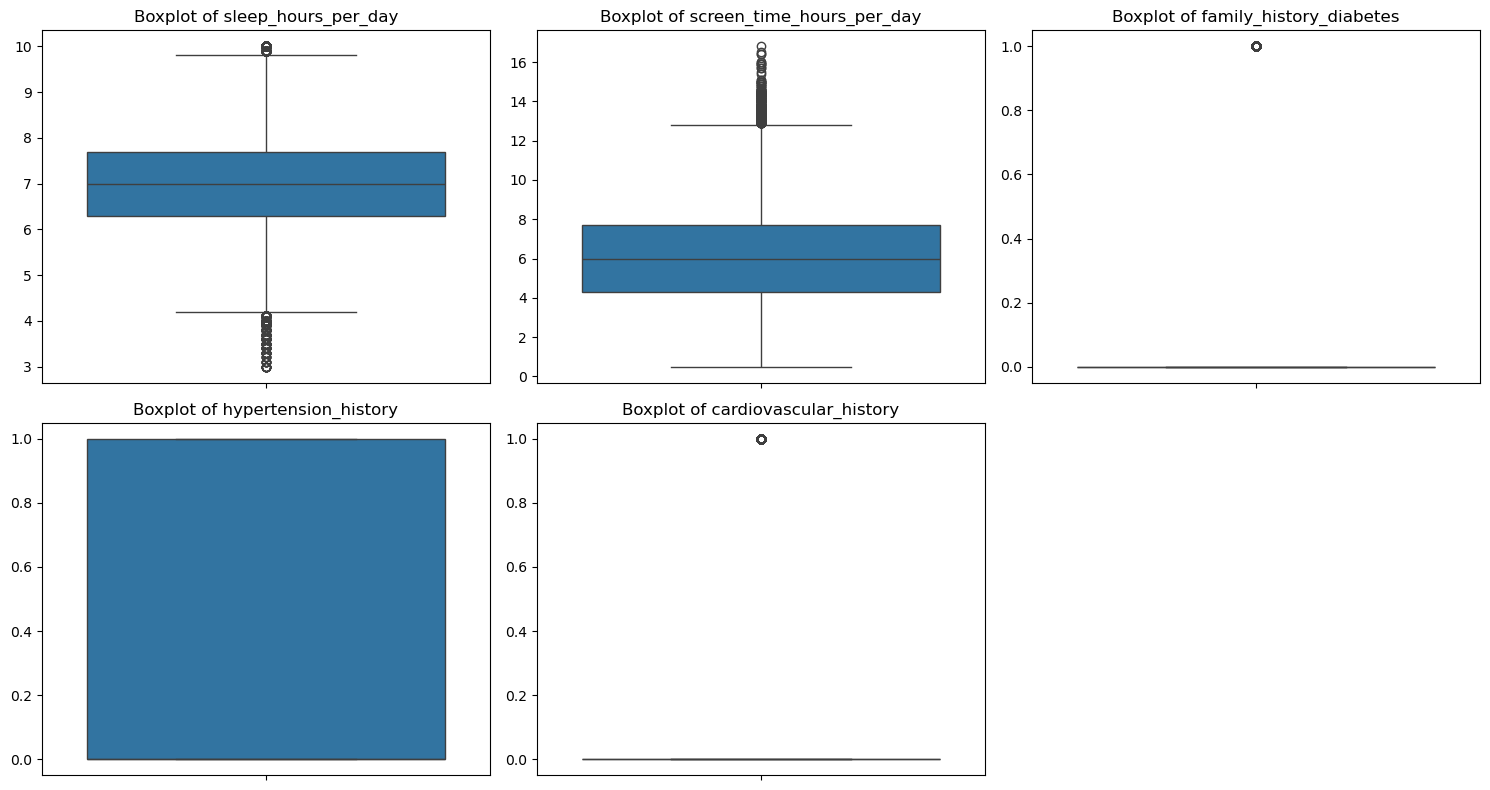

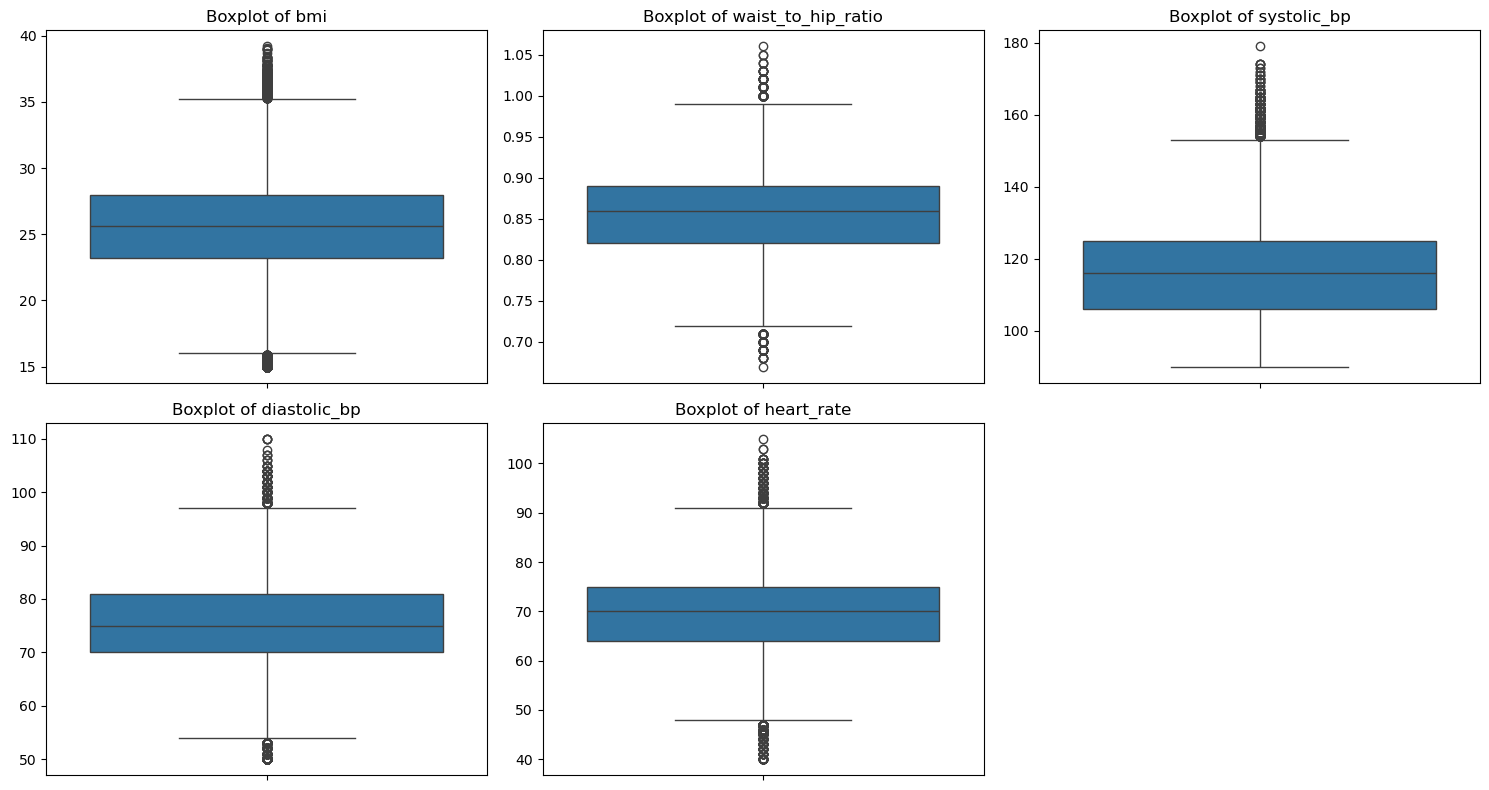

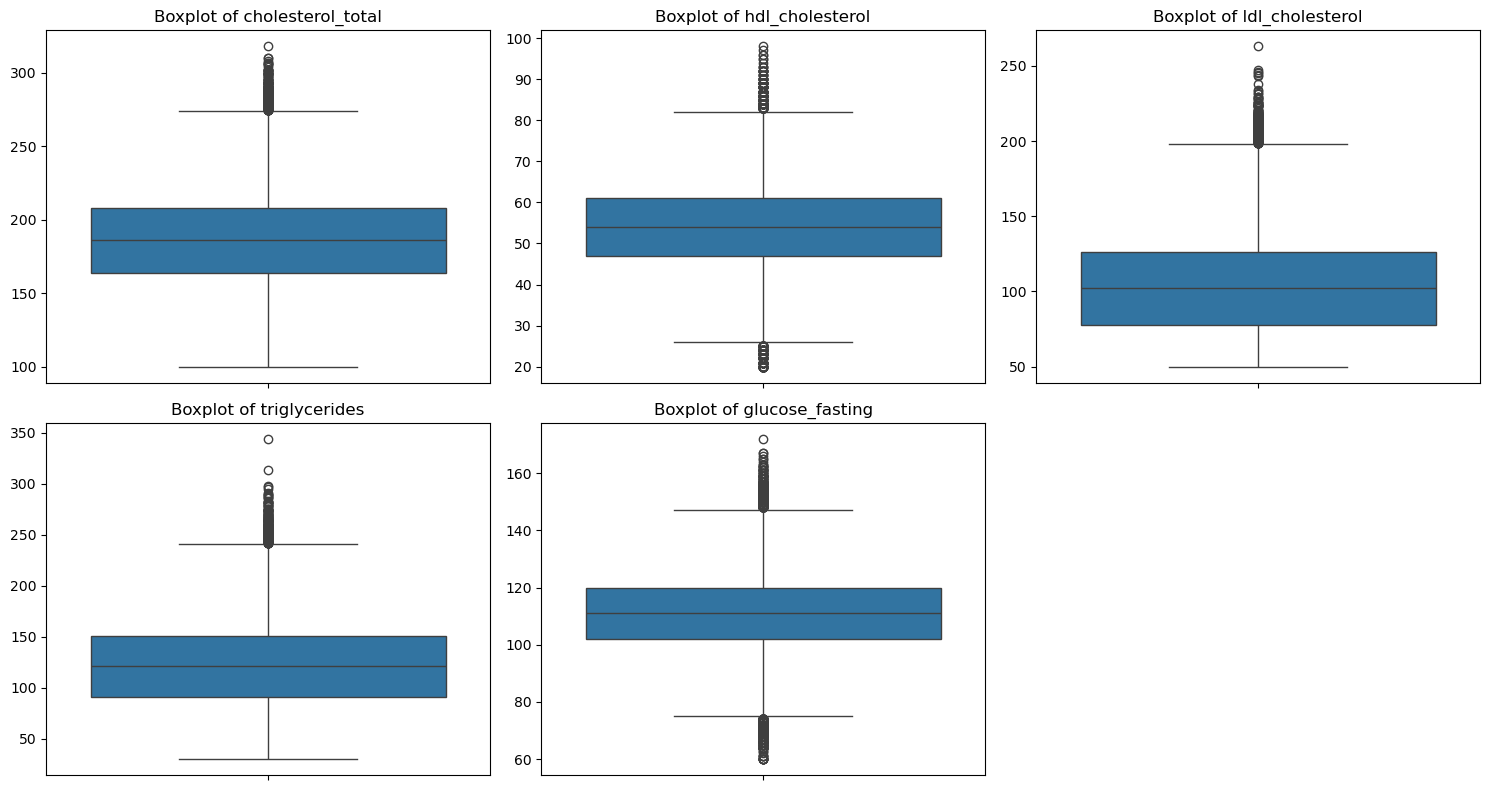

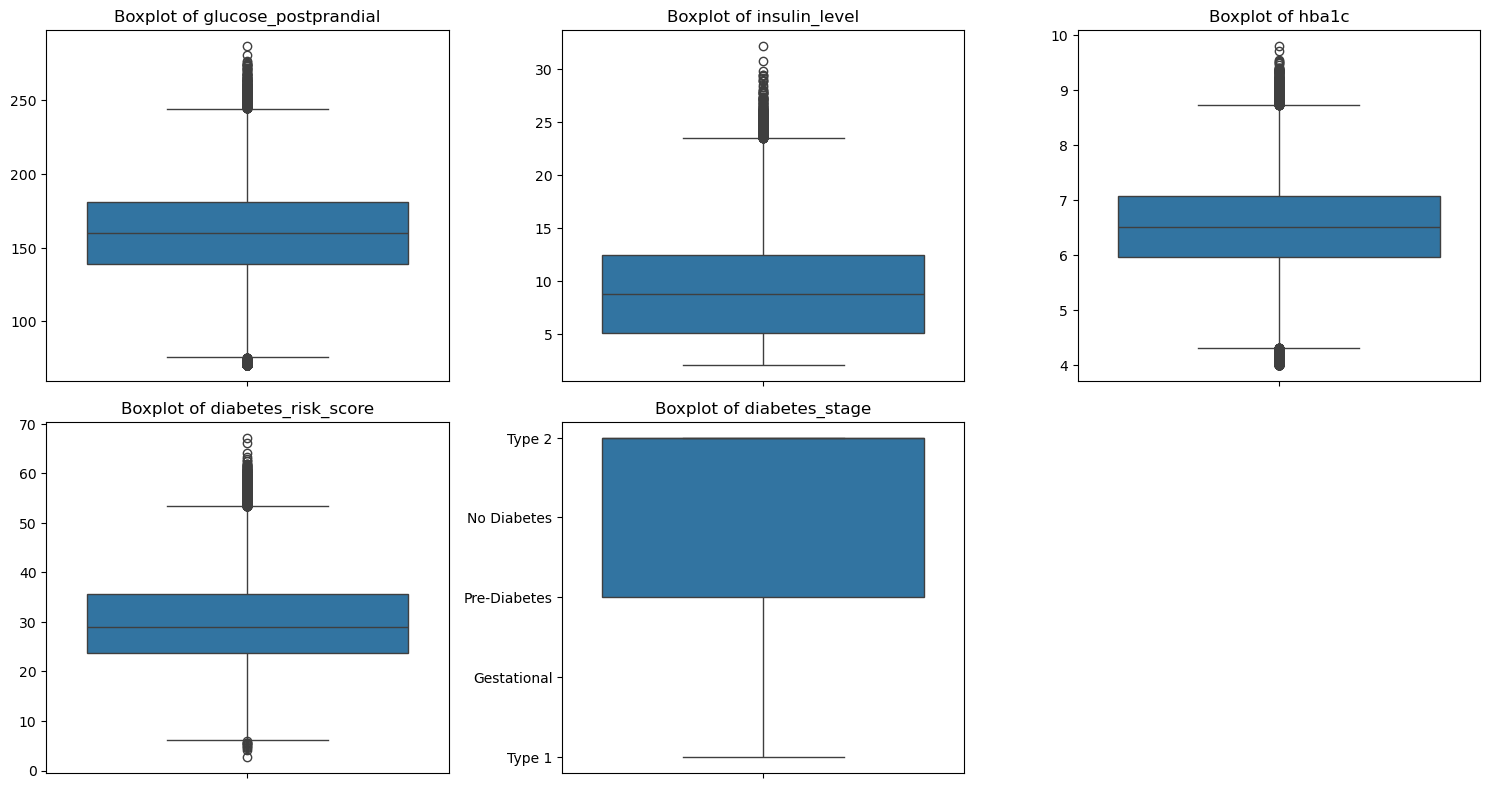

Capping outliers in {len(numerical_cols)} numerical columns
Skipping 'family_history_diabetes' (ID or binary).
Skipping 'hypertension_history' (ID or binary).
Skipping 'cardiovascular_history' (ID or binary).
Skipping 'diagnosed_diabetes' (ID or binary).
fixed outliers


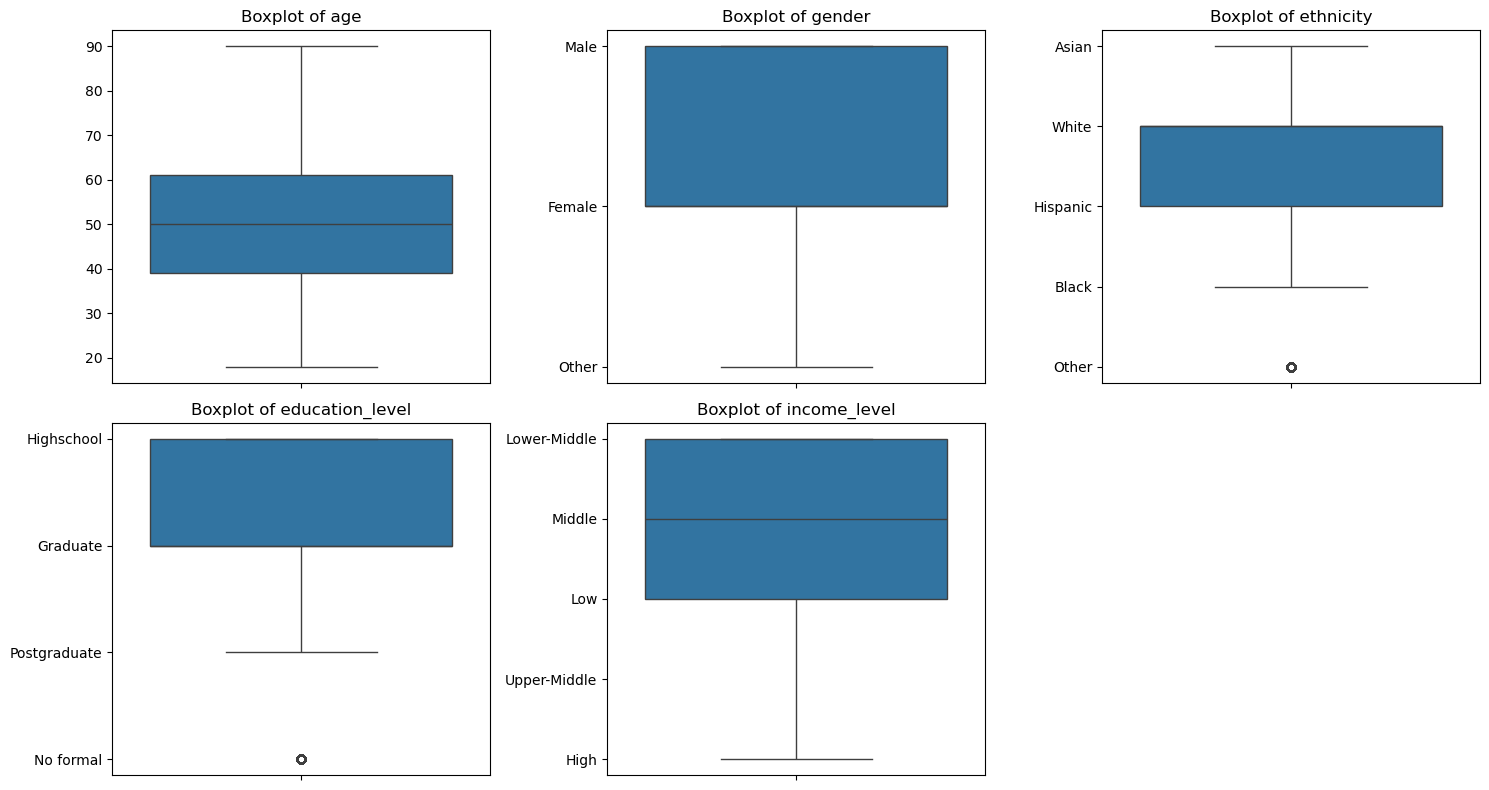

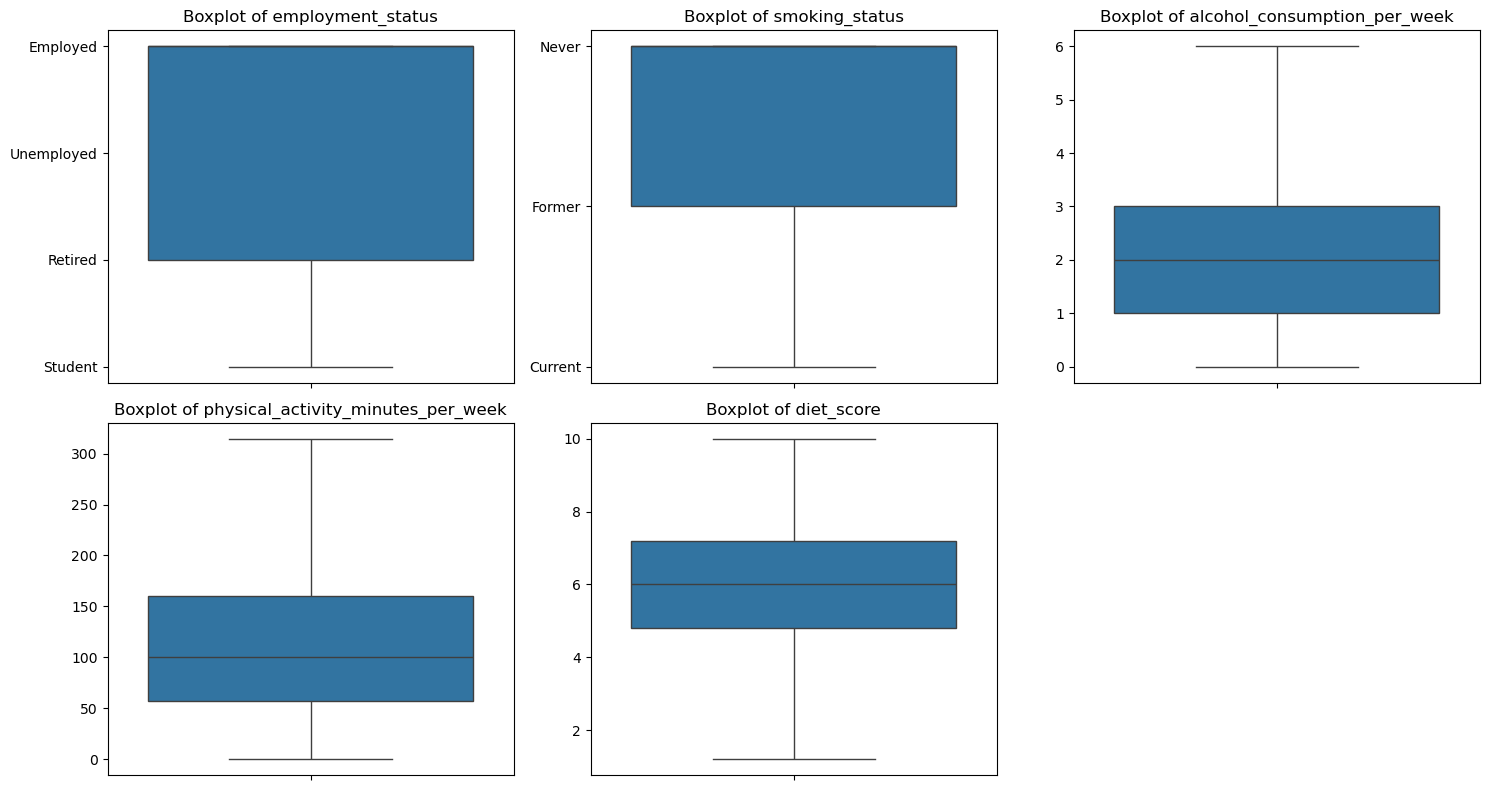

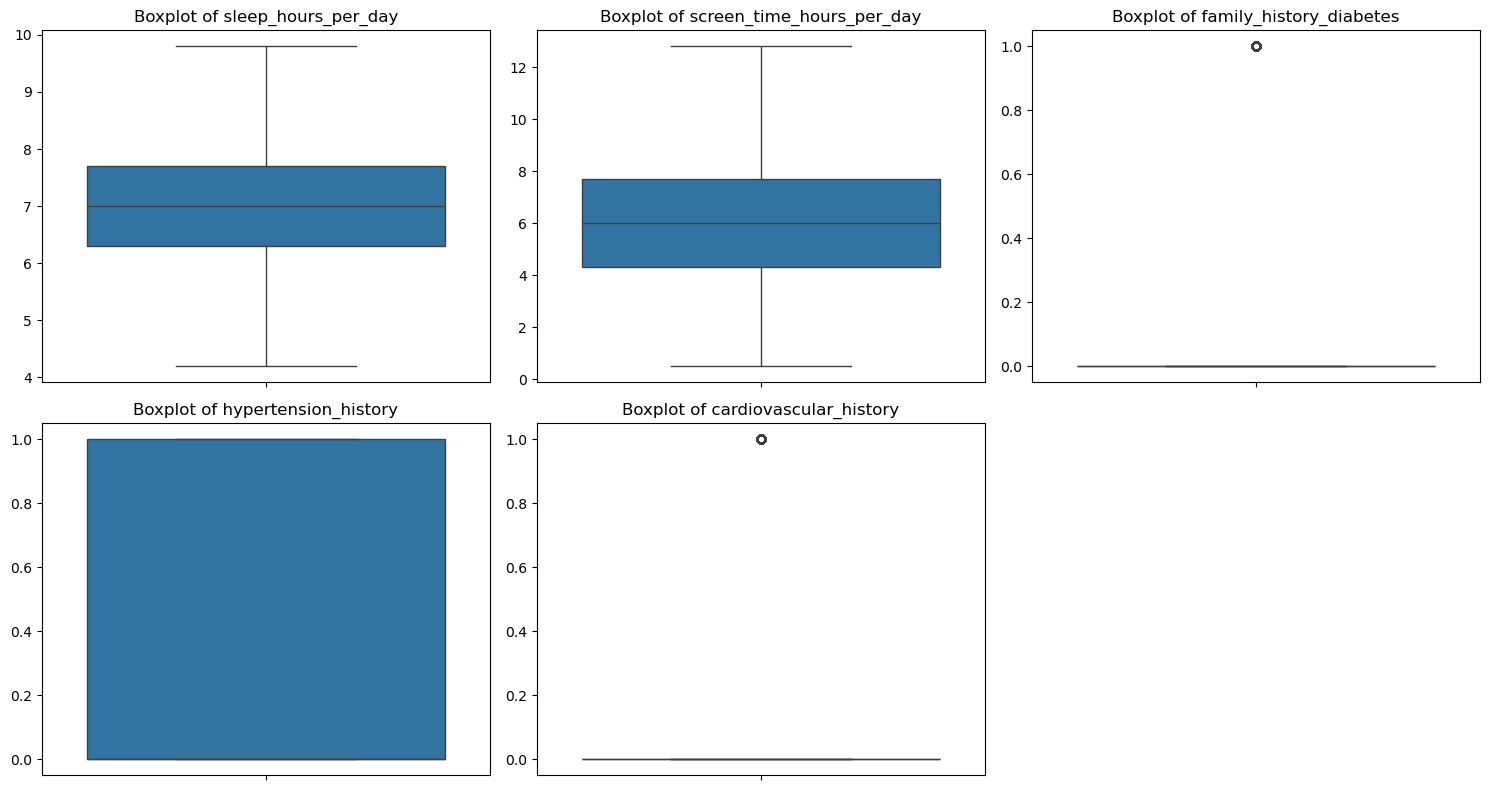

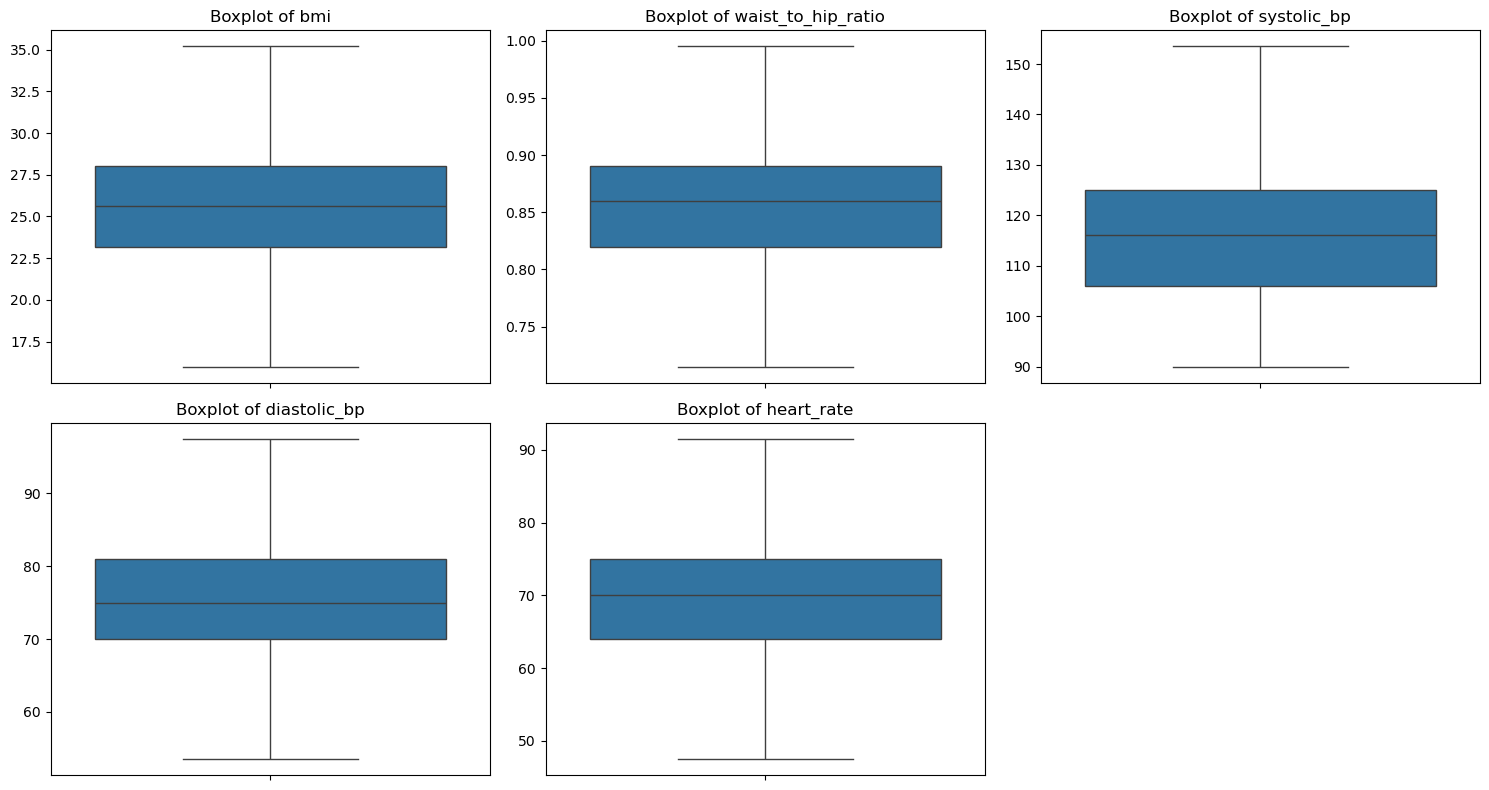

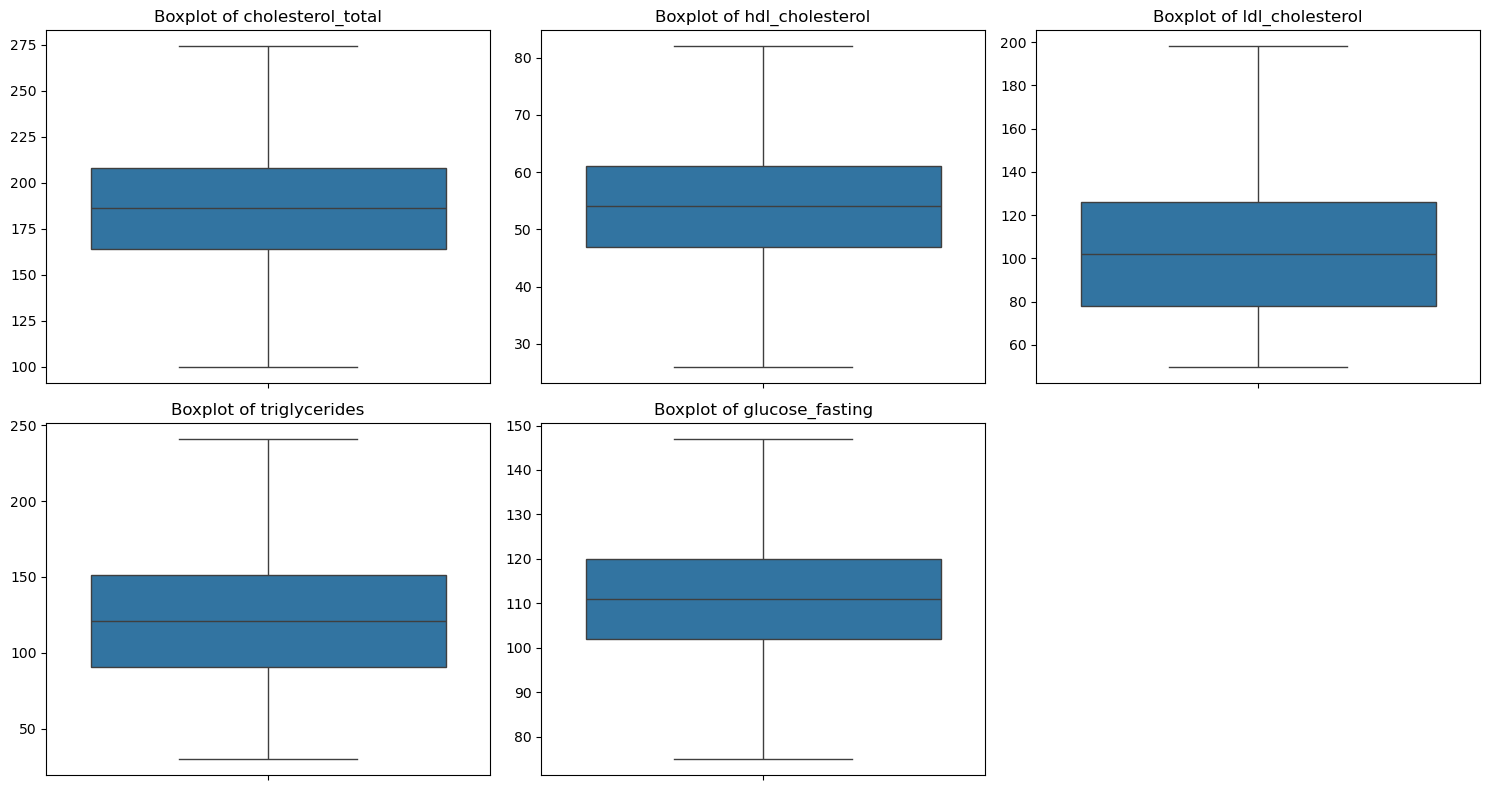

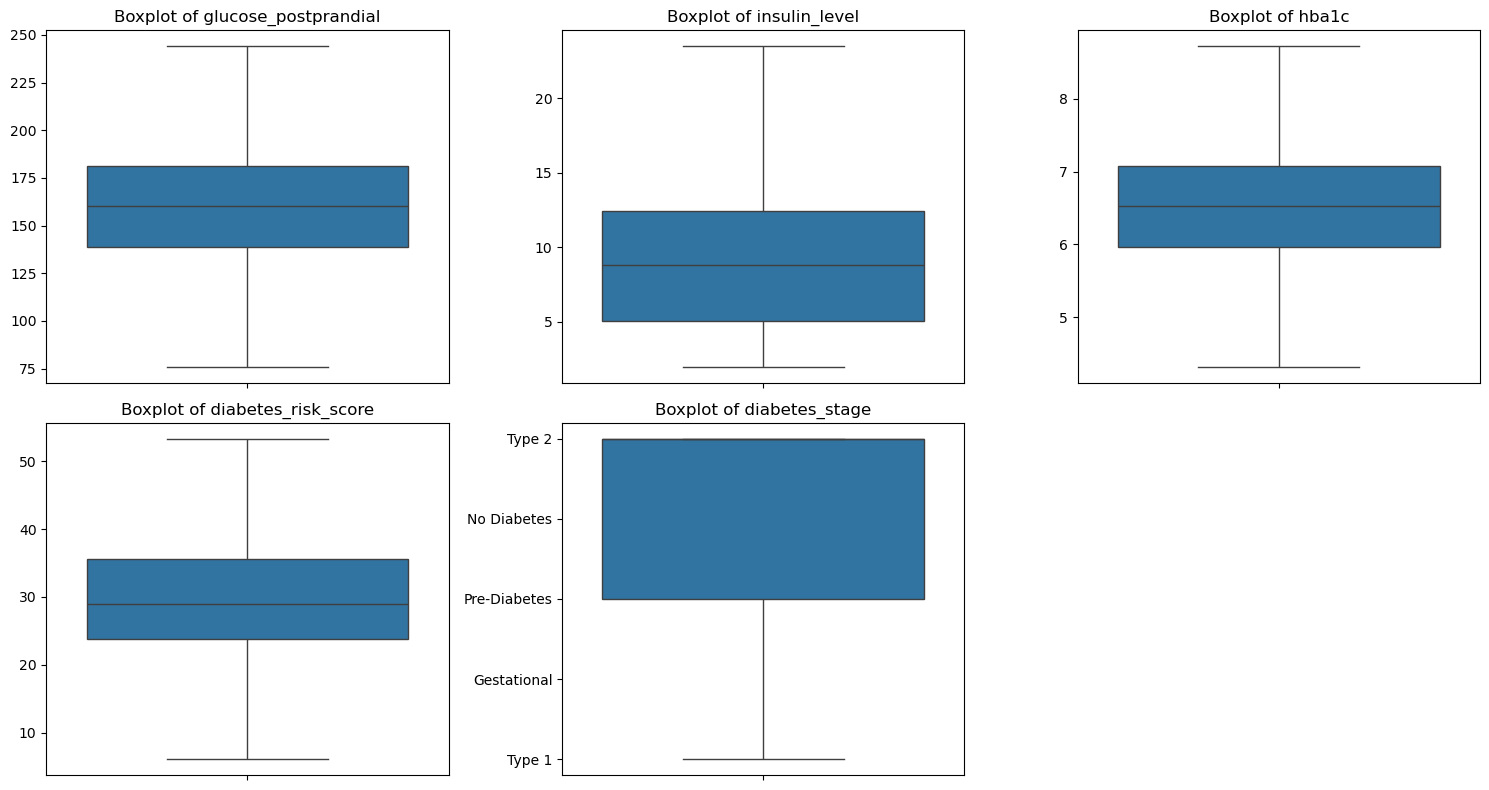

In [24]:
#outliers 
outlie = df.columns[0:-1] 

n_rows = 2
n_cols = 3
group_size = 5 
total_subplots_per_fig = n_rows * n_cols 

for i in range(0, len(outlie), group_size):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 8))
    ax_flat = axes.flatten()
    cols_chunk = outlie[i : i + group_size]
    for j, col_name in enumerate(cols_chunk):
        current_ax = ax_flat[j] 
        sns.boxplot(y=df[col_name], ax=current_ax)
        current_ax.set_title(f'Boxplot of {col_name}')
        current_ax.set_ylabel('')
    
    num_plots_in_chunk = len(cols_chunk)
    for j in range(num_plots_in_chunk, total_subplots_per_fig):
        ax_flat[j].axis('off') 
        
    plt.tight_layout()
    
    plt.show()

#fixing outliers 
numerical_cols = df.select_dtypes(include=np.number).columns
print("Capping outliers in {len(numerical_cols)} numerical columns")
for col in numerical_cols:
    
    if col == 'patient_id' or len(df[col].unique()) < 5:
        print(f"Skipping '{col}' (ID or binary).")
        continue

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    original_min = df[col].min()
    original_max = df[col].max()
    
    df[col] = np.clip(df[col], lower_bound, upper_bound)

print('fixed outliers')
outlie = df.columns[0:-1] 
n_rows = 2
n_cols = 3
group_size = 5 
total_subplots_per_fig = n_rows * n_cols 

for i in range(0, len(outlie), group_size):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 8))
    ax_flat = axes.flatten()
    cols_chunk = outlie[i : i + group_size]
    for j, col_name in enumerate(cols_chunk):
        current_ax = ax_flat[j] 
        sns.boxplot(y=df[col_name], ax=current_ax)
        current_ax.set_title(f'Boxplot of {col_name}')
        current_ax.set_ylabel('')
    
    num_plots_in_chunk = len(cols_chunk)
    for j in range(num_plots_in_chunk, total_subplots_per_fig):
        ax_flat[j].axis('off') 
        
    plt.tight_layout()
    
    plt.show()

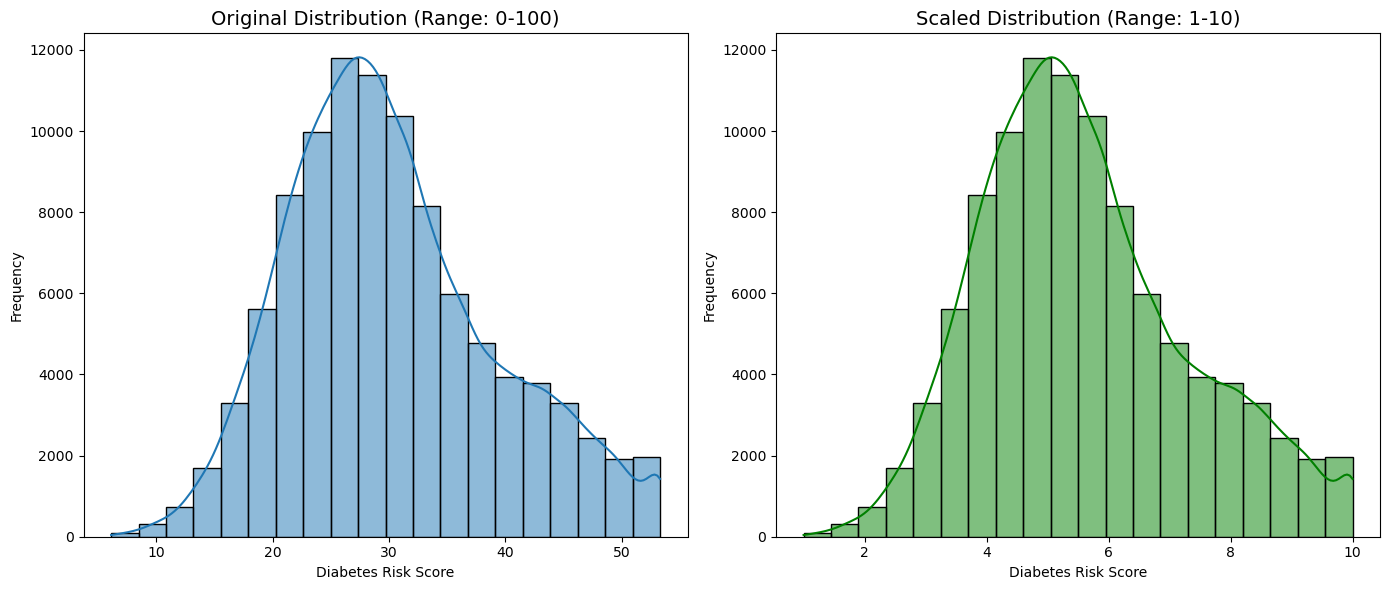

In [65]:
#scaling 
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
newmin=1
newmax=10
og_min=df['diabetes_risk_score'].min()
og_max=df['diabetes_risk_score'].max()
df['scaled_score_1_to_10'] = newmin + (
    (df['diabetes_risk_score'] - og_min) * (newmax - newmin)
) / (og_max - og_min)
sns.histplot(df['diabetes_risk_score'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Original Distribution (Range: 0-100)', fontsize=14)
axes[0].set_ylabel('Frequency')   
axes[0].set_xlabel('Diabetes Risk Score')  

sns.histplot(df['scaled_score_1_to_10'], bins=20, kde=True, ax=axes[1], color='green')
axes[1].set_title('Scaled Distribution (Range: 1-10)', fontsize=14)
axes[1].set_xlabel('Diabetes Risk Score')
axes[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [26]:
import pandas as pd

print("--- Applying Ordinal Encoding ---")

education_map = {
    'No formal': 0,
    'Highschool': 1,
    'Graduate': 2,
    'Postgraduate': 3
}
income_map = {
    'Low': 0,
    'Medium': 1,
    'High': 2
}
df['education_level'] = df['education_level'].map(education_map)
df['income_level'] = df['income_level'].map(income_map)

print("--- Applying Nominal Encoding ---")

nominal_cols = [
    'gender', 
    'ethnicity', 
    'employment_status',  
    'smoking_status'      
]

df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)


# --- 3. View the Result ---
print("\n--- Final Encoded DataFrame (df.head()) ---")
print(df.head())

print("\n--- Final DataFrame Info (df.info()) ---")
print(df.info())

--- Applying Ordinal Encoding ---
--- Applying Nominal Encoding ---

--- Final Encoded DataFrame (df.head()) ---
   age  education_level  income_level  alcohol_consumption_per_week  \
0   58                1           NaN                             0   
1   48                1           NaN                             1   
2   60                1           NaN                             1   
3   74                1           0.0                             0   
4   46                2           NaN                             1   

   physical_activity_minutes_per_week  diet_score  sleep_hours_per_day  \
0                               215.0         5.7                  7.9   
1                               143.0         6.7                  6.5   
2                                57.0         6.4                  9.8   
3                                49.0         3.4                  6.6   
4                               109.0         7.2                  7.4   

   screen_time_

diabetes_risk_score                   1.000000
scaled_score_1_to_10                  1.000000
family_history_diabetes               0.733443
age                                   0.494943
glucose_fasting                       0.469518
hba1c                                 0.329634
systolic_bp                           0.322820
bmi                                   0.312953
diagnosed_diabetes                    0.277524
glucose_postprandial                  0.276710
waist_to_hip_ratio                    0.241068
ldl_cholesterol                       0.227268
cholesterol_total                     0.197564
triglycerides                         0.179924
insulin_level                         0.141839
diastolic_bp                          0.135579
heart_rate                            0.091768
hypertension_history                  0.091265
cardiovascular_history                0.072764
screen_time_hours_per_day             0.070979
alcohol_consumption_per_week          0.011091
ethnicity_Bla

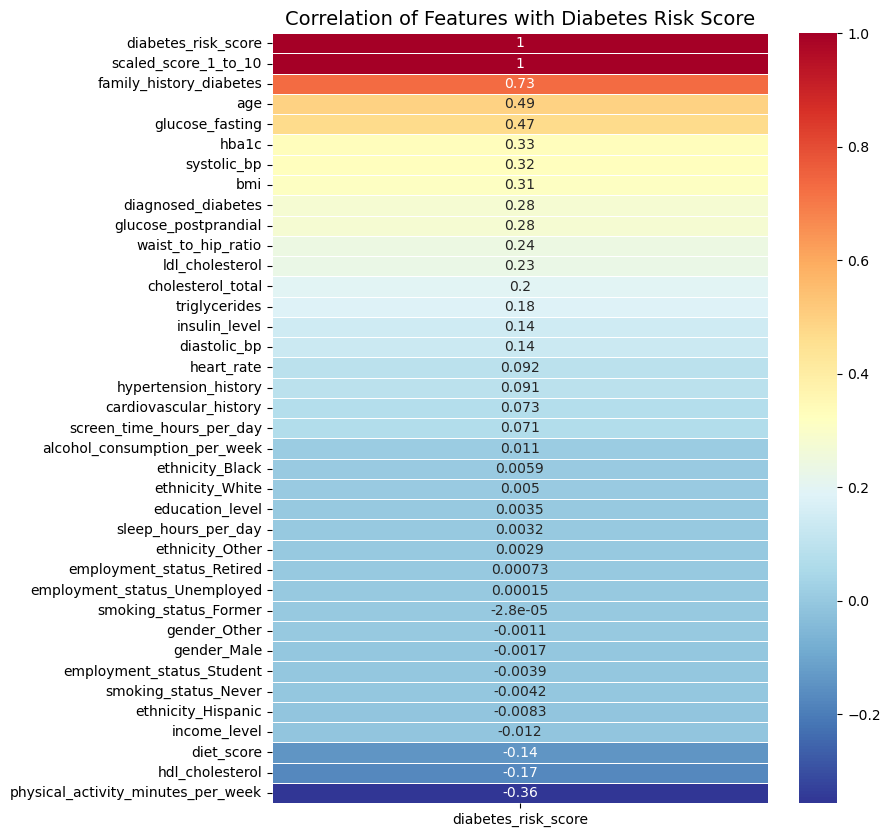

In [27]:
#creating a heatmap to show the correlation of each feature with diabetes
import matplotlib as mp
corr=df.corr(numeric_only=True)["diabetes_risk_score"].sort_values(ascending=False)
print(corr)
plt.figure(figsize=(8,10))
sns.heatmap(
    df.corr(numeric_only=True)[["diabetes_risk_score"]].sort_values(by="diabetes_risk_score", ascending=False),
    annot=True,
    cmap="RdYlBu_r",
    linewidths=0.5
)
plt.title("Correlation of Features with Diabetes Risk Score", fontsize=14)
plt.show()



Decision Tree Accuracy: 78.62%

Classification Report:
               precision    recall  f1-score   support

         Low       0.84      0.80      0.82      6709
      Medium       0.65      0.79      0.71      6641
        High       0.93      0.77      0.84      6650

    accuracy                           0.79     20000
   macro avg       0.80      0.79      0.79     20000
weighted avg       0.81      0.79      0.79     20000



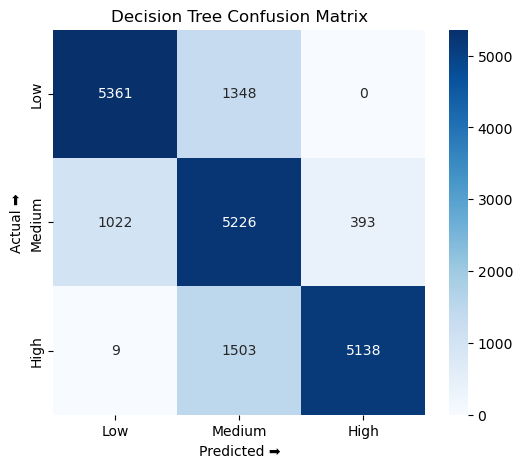

In [28]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

feature_columns = ['age', 'family_history_diabetes', 'physical_activity_minutes_per_week']
x = df[feature_columns]
y = df['scaled_score_1_to_10']

y_classified = pd.qcut(y, q=3, labels=[0, 1, 2]) # 0=Low, 1=Medium, 2=High

x = pd.get_dummies(x, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    x, y_classified, test_size=0.2, random_state=42, stratify=y_classified
)

dt_model = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nDecision Tree Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['Low', 'Medium', 'High']))


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low','Medium','High'],
            yticklabels=['Low','Medium','High'])
plt.xlabel('Predicted ➡️')
plt.ylabel('Actual ➡️')
plt.title('Decision Tree Confusion Matrix')
plt.show()



 Features scaled successfully (StandardScaler).
KNN Accuracy: 78.38%

Classification Report:
               precision    recall  f1-score   support

         Low       0.81      0.82      0.81      6709
      Medium       0.67      0.70      0.68      6641
        High       0.89      0.83      0.86      6650

    accuracy                           0.78     20000
   macro avg       0.79      0.78      0.79     20000
weighted avg       0.79      0.78      0.79     20000



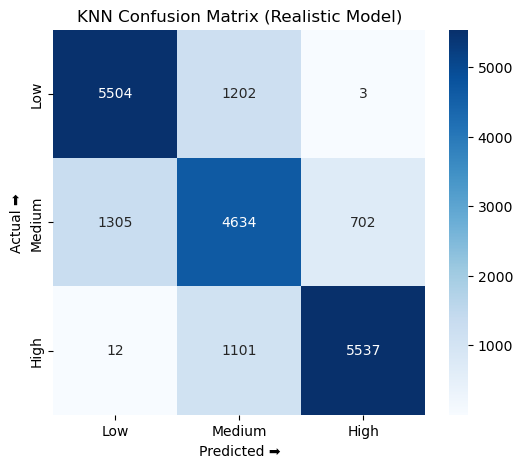

In [29]:
#KNN
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

feature_columns = ['age', 'family_history_diabetes', 'physical_activity_minutes_per_week']
x = df[feature_columns]
y = df['scaled_score_1_to_10']

y_classified = pd.qcut(y, q=3, labels=[0, 1, 2])  # 0=Low, 1=Medium, 2=High

x = pd.get_dummies(x, drop_first=True)


X_train, X_test, y_train, y_test = train_test_split(
    x, y_classified, test_size=0.2, random_state=42, stratify=y_classified
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(" Features scaled successfully (StandardScaler).")

knn_model = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
knn_model.fit(X_train_scaled, y_train)

y_pred = knn_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"KNN Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n",
      classification_report(y_test, y_pred, target_names=['Low', 'Medium', 'High']))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted ➡️')
plt.ylabel('Actual ➡️')
plt.title('KNN Confusion Matrix (Realistic Model)')
plt.show()


--- Features used for prediction ---
['age', 'family_history_diabetes', 'physical_activity_minutes_per_week']
SVM Accuracy: 81.04%

Classification Report:
               precision    recall  f1-score   support

         Low       0.85      0.83      0.84      6709
      Medium       0.69      0.78      0.73      6641
        High       0.92      0.83      0.87      6650

    accuracy                           0.81     20000
   macro avg       0.82      0.81      0.81     20000
weighted avg       0.82      0.81      0.81     20000



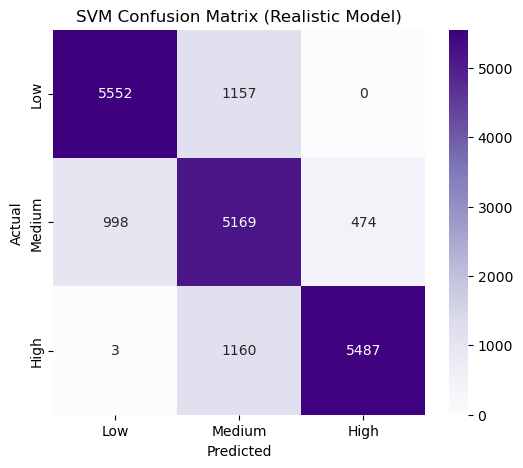

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


feature_columns = ['age', 'family_history_diabetes', 'physical_activity_minutes_per_week']
x = df[feature_columns]
y = df['scaled_score_1_to_10']

print(f"--- Features used for prediction ---\n{list(x.columns)}")

y_classified = pd.qcut(y, q=3, labels=[0, 1, 2])  # 0=Low, 1=Medium, 2=High
x = pd.get_dummies(x, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(
    x, y_classified, test_size=0.2, random_state=42, stratify=y_classified
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train)

y_pred = svm_model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"SVM Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n",
      classification_report(y_test, y_pred, target_names=['Low', 'Medium', 'High']))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['Low', 'Medium', 'High'],
            yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('SVM Confusion Matrix (Realistic Model)')
plt.show()

In [ ]:
#obseving the higher accuracy of the SVM model we can conclude SVM is a better model for this dataset due to its smaller size.